# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [34]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from selenium.webdriver.chrome.service import Service
import os

In [35]:
#this did not work for us so, we have alternative method
#browser = Browser('chrome')

In [36]:
driver_path = os.path.join(os.path.expanduser("~"),"webdrivers","chromedriver.exe")

In [37]:
# Set up Splinter
browser = Browser('chrome',service=Service(executable_path=driver_path))

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [38]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [39]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [40]:
# Extract all rows of data
table_body = html_soup.find('tbody')
table_rows = table_body.find_all('tr')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [41]:
# Create an empty list
table_row_contents = []
# Loop through the scraped data to create a list of rows
# Create a Pandas DataFrame by using the list of rows and a list of the column names
i=0
header_columns = []
rows_content = []
#iterate thrrough the rows
for table_row in table_rows:
    #check for table header table element and store in a list
    if(i==0):
        ths = table_row.find_all('th')
        for th in ths:
            header_columns.append(th.text)
        table_df = pd.DataFrame(header_columns)
        i+=1
    #check for table row element and store in a list
    else:
        tds = table_row.findAll('td')
        row_content =[]
        for td in tds:
            row_content.append(td.text)
        rows_content.append(row_content)

In [42]:
# Confirm DataFrame was created successfully
mars_table_df = pd.DataFrame(rows_content,columns=header_columns)
mars_table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [43]:
# Examine data type of each column
mars_table_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [44]:
# Change data types for data analysis
mars_table_df["id"] = mars_table_df["id"].astype("long")
mars_table_df["terrestrial_date"] = pd.to_datetime(mars_table_df["terrestrial_date"])
mars_table_df["sol"] = mars_table_df["sol"].astype("int32")
mars_table_df["ls"] = mars_table_df["ls"].astype("int32")
mars_table_df["month"] = mars_table_df["month"].astype("int32")
mars_table_df["min_temp"] = mars_table_df["min_temp"].astype("float")
mars_table_df["pressure"] = mars_table_df["pressure"].astype("float")

In [45]:
mars_table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [46]:
# Confirm type changes were successful by examining data types again
mars_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [47]:
# 1. How many months are there on Mars?
mars_months_arr = mars_table_df["month"].unique()
mars_months_count = len(mars_months_arr)
print(f"Total number of Mars months are {mars_months_count}")

Total number of Mars months are 12


In [48]:
# 2. How many Martian days' worth of days of data are there?
mars_days = mars_table_df["sol"].sort_values()
mars_days_count = mars_days.count()
mars_days_count

1867

In [49]:
# 3. What is the average low temperature by month?
avg_low_temp = mars_table_df.groupby("month")["min_temp"].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

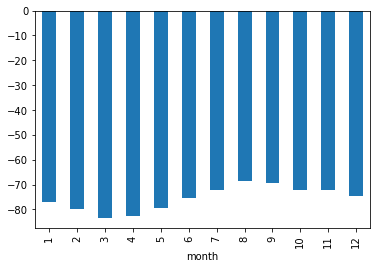

In [50]:
# Plot the average temperature by month
avg_low_temp.plot.bar()

In [51]:
# Identify the coldest and hottest months in Curiosity's location
sorted_avg_low_temp  = avg_low_temp.sort_values().reset_index()
sorted_avg_low_temp.head(12)
coldest_month = sorted_avg_low_temp["month"].iloc[0]
hotest_month = sorted_avg_low_temp["month"].iloc[-1]
coldest_month
hotest_month

print(f"Hotest Month : {hotest_month} , Coldest Month : {coldest_month}")

Hotest Month : 8 , Coldest Month : 3


In [52]:
# 4. Average pressure by Martian month
avg_pressure_by_months = mars_table_df.groupby("month")["pressure"].mean()
#avg_pressure_by_months.reset_index()

In [53]:
# Highest Pressure in the month
max_pressure_month = avg_pressure_by_months.idxmax(axis=1)
max_pressure_month
min_pressure_month = avg_pressure_by_months.idxmin(axis=1)
min_pressure_month
print(f"Highest pressure is there for the martian month : {max_pressure_month}")
print(f"Lowest pressure is there for the martian month : {min_pressure_month}")

Highest pressure is there for the martian month : 9
Lowest pressure is there for the martian month : 6


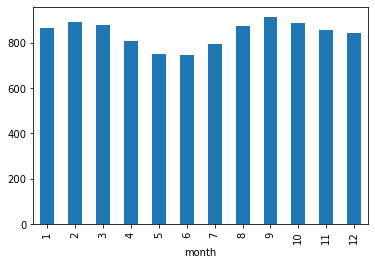

In [54]:
# Plot the average pressure by month
avg_pressure_by_months.plot.bar()

In [92]:
# 5. How many terrestrial (earth) days are there in a Martian year?
prev_month = 6
current_month = 6
i=0
j=0
for index,row in  mars_table_df.iterrows():
    current_month = int(row["month"])
    print(j)
    if((current_month==7) and (prev_month==6) and (j==0)):
        i+=1
        j=1
    # elif(j==1 or j==0):
    #     i+=1
    #     print(f"{prev_month} {current_month}")
    elif(j==1):
        i+=1
    elif((prev_month==7) and (current_month==8)):
        i+=1
        j=2
        break
    #     j=2
    #     break
    # else:
    #     break
    #     j=2
    #     i+=1
    #     print(f"{i}")
    # elif((j==1) or (j==2)):
    #     i+=1
    # elif((prev_month==7) and (current_month==8) and (j==2)):
    #     j=3
    #     break
    prev_month=current_month
    # elif((j==2)):
    #     print(f'{current_month} {prev_month}')
    #     print(f"{i}")
    #     i+=1
    #     prev_month=current_month
    # else:
    #     prev_month=current_month
    

i

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1827

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [56]:
# Write the data to a CSV


In [57]:
#browser.quit()